# Image Deconvolution
### Dr. Tirthajyoti Sarkar, Fremont CA 94536
In this example, we deconvolve a noisy version of an image using Wiener and unsupervised Wiener algorithms. This algorithms are based on linear models that can’t restore sharp edge as much as non-linear methods (like TV restoration) but are much faster.

### Wiener filter
The inverse filter based on the PSF (Point Spread Function), the prior regularisation (penalisation of high frequency) and the tradeoff between the data and prior adequacy. The regularization parameter must be hand tuned.

### Unsupervised Wiener
This algorithm has a self-tuned regularisation parameters based on data learning. This is not common and based on the following publication. The algorithm is based on a iterative Gibbs sampler that draw alternatively samples of posterior conditional law of the image, the noise power and the image frequency power.

> François Orieux, Jean-François Giovannelli, and Thomas Rodet, *“Bayesian estimation of regularization and point spread function parameters for Wiener-Hunt deconvolution”*, J. Opt. Soc. Am. A 27, 1593-1607 (2010)

### Richardson-Lucy deconvolution algorithm
The algorithm is based on a PSF (Point Spread Function), where PSF is described as the impulse response of the optical system. The blurred image is sharpened through a number of iterations, which needs to be hand-tuned.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

### Load image and convolve

In [3]:
astro = color.rgb2gray(data.astronaut())
orig = astro
psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
astro += 0.1 * astro.std() * np.random.standard_normal(astro.shape)

### Deconvolution

In [4]:
deconvolved, _ = restoration.unsupervised_wiener(astro, psf)

### Show

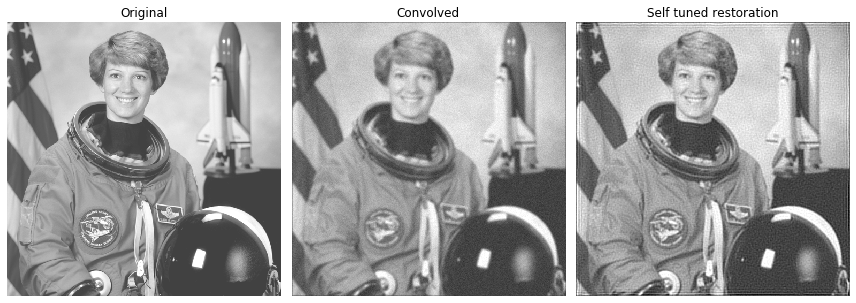

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0].imshow(orig, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(astro, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[1].axis('off')
ax[1].set_title('Convolved')

ax[2].imshow(deconvolved)
ax[2].axis('off')
ax[2].set_title('Self tuned restoration')

fig.tight_layout()

plt.show()

### Richardson-Lucy

In [7]:
astro = color.rgb2gray(data.astronaut())

psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30)

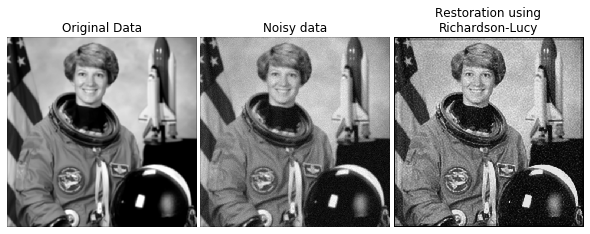

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()